In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data=data.drop('User ID',axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
data=pd.get_dummies(data)
data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
x=data.drop('Purchased',axis=1)
y=data['Purchased']

**Hold out Technique**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
score_lr=lrmodel.score(x_test,y_test)

In [ ]:
score_lr

0.63

**K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k=KFold(10)

In [ ]:
k

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
for train_index,test_index in k.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_result=cross_val_score(lrmodel,x,y,cv=k)

In [ ]:
cv_result

array([0.65 , 0.925, 0.925, 0.925, 0.925, 0.525, 0.925, 0.425, 0.475,
       0.25 ])

In [ ]:
np.mean(cv_result)

0.6950000000000001

**Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=10)

In [ ]:
for train_index,test_index in sk.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282

In [ ]:
skvc_result=cross_val_score(lrmodel,x,y,cv=sk)

In [ ]:
skvc_result

array([0.65 , 0.65 , 0.65 , 0.65 , 0.65 , 0.65 , 0.65 , 0.625, 0.625,
       0.625])

In [ ]:
np.mean(skvc_result)

0.6425000000000001

**Feature Engineering**

In [ ]:
df=pd.read_csv('demand-forecast.csv')
df

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [ ]:
df.shape

(18247, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['year']=df['date'].apply(lambda x:x.year)

In [ ]:
df.head()

,date,hour,demand,year
0,2018-08-18,9,91,2018
1,2018-08-18,10,21,2018
2,2018-08-18,13,23,2018
3,2018-08-18,14,104,2018
4,2018-08-18,15,81,2018


In [ ]:
df['month']=df['date'].apply(lambda x:x.month)
df['day']=df['date'].apply(lambda x:x.day)

In [ ]:
df.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [ ]:
df['dayofweek'] = df['date'].apply(lambda x:x.dayofweek)
df['quater'] = df['date'].apply(lambda x:x.quarter)

In [ ]:
df.head()

,date,hour,demand,year,month,day,dayofweek,quater
0,2018-08-18,9,91,2018,8,18,5,3
1,2018-08-18,10,21,2018,8,18,5,3
2,2018-08-18,13,23,2018,8,18,5,3
3,2018-08-18,14,104,2018,8,18,5,3
4,2018-08-18,15,81,2018,8,18,5,3


In [ ]:
def timeOfDay(n):
  if n in range(1,4):
    return 'Late Night'
  elif n in range(4,7):
    return 'Early Morning'
  elif n in range(7,12):
    return 'Morning'
  elif n  in range(12,15):
    return 'Afternoon'
  elif n in range(15,18):
    return 'Evening'
  elif n in range(18,24) or n==0:
    return 'Night'

In [ ]:
df['typeOfDay'] = df['hour'].apply(lambda x:timeOfDay(x))

In [ ]:
df.head()

,date,hour,demand,year,month,day,dayofweek,quater,typeOfDay
0,2018-08-18,9,91,2018,8,18,5,3,Morning
1,2018-08-18,10,21,2018,8,18,5,3,Morning
2,2018-08-18,13,23,2018,8,18,5,3,Afternoon
3,2018-08-18,14,104,2018,8,18,5,3,Afternoon
4,2018-08-18,15,81,2018,8,18,5,3,Evening


In [ ]:
def monthToSeasons(x):
  if x in [9,10,11]:
      return 'Spring'
  elif x in [12,1,2]:
      return 'Winter'
  elif x in [3,4,5]:
      return 'Summer'
  elif x in [6,7,8]:
      return 'Autumn'


In [ ]:
df['Season']=df['month'].apply(monthToSeasons)

In [ ]:
df.head()

,date,hour,demand,year,month,day,dayofweek,quater,typeOfDay,Season
0,2018-08-18,9,91,2018,8,18,5,3,Morning,Autumn
1,2018-08-18,10,21,2018,8,18,5,3,Morning,Autumn
2,2018-08-18,13,23,2018,8,18,5,3,Afternoon,Autumn
3,2018-08-18,14,104,2018,8,18,5,3,Afternoon,Autumn
4,2018-08-18,15,81,2018,8,18,5,3,Evening,Autumn


In [ ]:
df.shape

(18247, 10)

<Axes: xlabel='Season', ylabel='demand'>

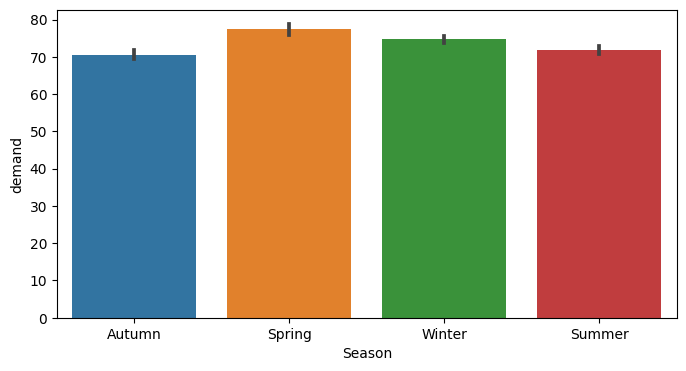

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Season'],y=df['demand'])

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['dayOfweek'],y=df['demand'])

KeyError: ignored

<Figure size 800x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['typeOfDay'],y=df['demand'])